## Homework 2, Intro to NLP, 2017

#### This is due at 11pm on Tuesday, October 10. Please see detailed submission instructions below.  100 points total.

##### How to do this problem set:

- What version of Python should I use? 2.7

- Most of these questions require writing Python code and computing results, and the rest of them have textual answers. To generate the answers, you will have to fill out supporting files, `vit_starter.py`,`classperc.py` and `structperc.py`.

- Write all the answers in this ipython notebook. Once you are finished (1) Generate a PDF via (File -> Download As -> PDF) and upload to Gradescope (2)Turn in `vit_starter.py`, `classperc.py`, `structperc.py` and `hw_2.ipynb` on Moodle.
  
- **Important:** Check your PDF before you turn it in to gradescope to make sure it exported correctly. If ipython notebook gets confused about your syntax it will sometimes terminate the PDF creation routine early. You are responsible for checking for these errors. If your whole PDF does not print, try running `$jupyter nbconvert --to pdf hw_1.ipynb` to identify and fix any syntax errors that might be causing problems.

- **Important:** When creating your final version of the PDF to hand in, please do a fresh restart and execute every cell in order. Then you'll be sure it's actually right. One convenient way to do this is by clicking `Cell -> Run All` in the notebook menu.
 

##### Academic honesty 

- We will audit the Moodle code from a few dozen students, chosen at random. The audits will check that the code you wrote and turned on Moodle generates the answers you turn in on your Gradescope PDF. If you turn in correct answers on your PDF without code that actually generates those answers, we will consider this a potential case of cheating. See the course page for honesty policies.

- We will also run automatic checks of code on Moodle for plagiarism. Copying code from others is considered a serious case of cheating.

## 1. HMM (15 points)

Answer the following questions using the transition matrix
$T$ and emission probabilities $E$ below. Below, $\Delta$ and $\Box$
are two output variables, $A$ and $B$ are two hidden states; $s_n$ refers to
the $n^{th}$ hidden state in the sequence and $o_n$ refers to the
$n^{th}$ observation.

<img src="2.png"> 

For all the questions in this section, write answer and show your work.

**Question 1.1 (2 points)**

Does $P(o_2=\Delta|s_1=B) = P(o_2=\Delta|o_1=\Box)$?

No

P(o2=Δ|s1=B)=0.4x0.3+0.4x0.5=0.32

For RHS:
1. P(A|◻)=0.5/(0.5+0.7)=0.4167 and P(B|◻)=0.7/(0.5+0.7)=0.5833 (As expected their sum is 1)
2. P(o2=Δ|o1=◻)=P(o2=Δ|s1=A)*0.4167 + P(o2=Δ|s1=A)*0.5833= 0.4167(0.2x0.5+0.3x0.3)+0.5833(0.4x0.3+0.4x0.5)
3. P(o2=Δ|o1=◻)=0.2658

**Question 1.2 (2 points)**

Does $P(s_2=B|s_1=A) = P(s_2=B|s_1=A, o_1 = \Delta)$?

1. Yes
2. Here, observations in previous steps do not affect the future hidden states. The information that o1 occured earlier (in conjunction with the occurence of s1) will not affect the probability of occurence of s2.
3. Thus, P(s2=B|s1=A,o1=Δ)=P(s2=B|s1=A)

**Question 1.3 (3 points)**

Does $P(o_2=\Delta|s_1=A) = P(o_2=\Box|s_1=A, s_3=A)$

1. NO
2. Consider the RHS. Here, given s3 will impact what s2 is (For s3='A' s2 being =B has higher probability than s2=A). This will in turn affect what o2's probability. The informaton in this probability graph can flow from future states also.
3. But in LHS, only s1 is present. Thus, they shouldn't be equal

**Question 1.4 (3 points)**

Compute the probability of observing $\Box$ as the first emission of a sequence generated by an HMM with transition
matrix $T$ and emission probabilities $E$.

P(o1=$\Box$) = P(o1=$\Box$|s1=A)*P(s1=A) + P(o1=$\Box$|s1=B)*P(s1=B) = 0.5x0.5+0.5x0.7=0.6

**Question 1.5 (5 points)**

Compute the probability of the first state being $A$ given that the last token in an observed sequence of length 2
was the token $\Delta$.

Let us solve in reverse direction.
There are 4 sequences of length 2: (A,A,Δ), (A,B,Δ), (B,A,Δ), (B,B,Δ)

Thus required probability is P(A,A,Δ)+P(A,B,Δ)/P(A,A,Δ)+(A,B,Δ)+(B,A,Δ)+(B,B,Δ)

Here, 
P(A,A,Δ)=P(A|A)*P(Δ|A)= 0.2x0.5

P(A,B,Δ)=P(A|B)*P(Δ|B)= 0.3x0.3

P(B,B,Δ)=P(B|B)*P(Δ|B)= 0.4x0.3

P(B,A,Δ)=P(B|A)*P(Δ|A)= 0.4x0.5

Thus, Answer=0.19/0.51=0.3725

Note: Here Start to A and B both is 0.5 so it'll cancel throughout in numerator and denominator.
I'm assuming the sequence goes on and hence, end state is not included.



## 2. Viterbi (log-additive form) (20 points)

<img src="1.png"> 



One HMM chain is shown on the left.  The corresponding **factor graph** version is shown on the right.
This simply shows the structure of the $A$ and $B_t$ log-prob tables and which variables they express
preferences over. $A$ is the **transition factor** that has preferences for the two neighboring
variables; for example, $A(y_1,y_2)$ shows how happy the model is with the transition from $y_1$ to $y_2$.
The same transition preference function is used at all positions $(t-1,t)$ for each $t=2..T$.
$B_t$ is the **emission factor** that has preferences for the variable $y_t$.
As a goodness function it is e.g. $B_1(y_1)$, $B_2(y_2)$, etc.

Let $\vec{y} = (y_1,y_2,...,y_T)$, a proposed tag sequence for a $T$ length sentence.
The total goodness function for a solution $\vec{y}$ is

$$ G(\vec{y}) = \sum_{t=1}^{T} B_t(y_t)  + \sum_{t=2}^{T} A(y_{t-1},y_t) $$


**Question 2.1 (2 points)**

Define $A$ and $B_t$ in terms of the HMM model, such that $G$ is the same thing as $\log p(\vec{y},\vec{w})$ under the HMM.

A($y_{t-1},y_t$)=log P($y_t|y_{t-1}$) #log of Transition Probability

$B_t(y_t)$=log P($w_t|y_t$) #log of Emission Probability

**Question 2.2 (18 points)**

Implement additive log-space Viterbi by completing the **viterbi()** function. It takes in tables that represent the $A$ and $B$ functions as input.  We give you an implementation of $G()$ in **vit_starter**, you can check to make sure you understand the data structures, and also the exhaustive decoding algorithm too.  Feel free to add debugging print statements as needed.  The main code runs the exercise example by default.

When debugging, you should make new A and B examples that are very simple. This will test different code paths.  Also you can try the **randomized\_test()** from the starter code.

Look out for negative indexes as a bug.  In python, if you use an index that's too high to be in the list, it throws an error.  But it will silently accept a negative index ... it interprets that as indexing from the right.


In [1]:
# Implement the viterbi() function in vit_starter.py and then run this cell to show your output

from vit_starter import *

if __name__=='__main__':
    A = {(0,0):3, (0,1):0, (1,0):0, (1,1):3}
    Bs= [ [0,1], [0,1], [30,0] ]
    # that's equivalent to: [ {0:0,1:1}, {0:0,1:1}, {0:30,1:0} ]

    y = exhaustive(A, Bs, set([0,1]))
    print "Exhaustive decoding:", y
    print "score:", goodness_score(y, A, Bs)
    y = viterbi(A, Bs, set([0,1]))
    print "Viterbi    decoding:", y


Exhaustive decoding: [0, 0, 0]
score: 36
Viterbi    decoding: [0, 0, 0]


**Copy and paste the viterbi function that you implemented in `vit_starter.py`.**

In [2]:
def viterbi(A_factor, B_factors, output_vocab):
    """
    A_factor: a dict of key:value pairs of the form
        {(curtag,nexttag): score}
    with keys for all K^2 possible neighboring combinations,
    and scores are numbers.  We assume they should be used ADDITIVELY, i.e. in log space.
    higher scores mean MORE PREFERRED by the model.

    B_factors: a list where each entry is a dict {tag:score}, so like
    [ {Noun:-1.2, Adj:-3.4}, {Noun:-0.2, Adj:-7.1}, .... ]
    each entry in the list corresponds to each position in the input.

    output_vocab: a set of strings, which is the vocabulary of possible output
    symbols.

    RETURNS:
    the tag sequence yvec with the highest goodness score
    """

    N = len(B_factors)   # length of input sentence

    # viterbi log-prob tables #List of dictionaries
    V = [{tag:None for tag in output_vocab} for t in range(N)]
    # backpointer tables #List of dictionaries
    # back[0] could be left empty. it will never be used.
    back = [{tag:None for tag in output_vocab} for t in range(N)] 

    # todo implement the main viterbi loop here
    # you may want to handle the t=0 case separately
    for i in output_vocab:
        V[0][i]=B_factors[0][i]
    #print V
    for t in range(1,N):
        for i in output_vocab:
            viter_values=[]
            for j in output_vocab:
                viter_values.append((V[t-1][j]+A_factor[(j,i)]+B_factors[t][i]))
            V[t][i]=max(viter_values)
            back[t][i]=viter_values.index(V[t][i])
    # todo implement backtrace also
    #print V
    #print back
    idx=dict_argmax(V[-1])
    # dummy return value
    #return [None for t in range(N)]
    seq=[idx]
    output_vocab_list=list(output_vocab)
    for i in range(N-1,0,-1):
        idx=output_vocab_list[back[i][idx]]
        seq.append(idx)
    seq.reverse()
    return seq

## 3. Averaged Perceptron (5 points)

We will be using the following definition of the perceptron, which is
the multiclass or structured version of the perceptron.
The training set is a bunch of input-output pairs $(x_i,y_i)$.
(For classification, $y_i$ is a label, but for tagging, $y_i$ is a sequence). The training algorithm is as follows:

For T iterations, iterate through each $(x_i,y_i)$ pair in the dataset, and for each,
   1. Predict $y^* := \arg\max_{y'} \theta^T f(x_i, y')$
   2. If $y_i \neq y^*$: then update $\theta := \theta^{(old)} + r g$


where $r$ is a fixed step size (e.g. $r=1$)
and $g$ is the *gradient vector*, meaning a vector that will get added
into $\theta$ for the update, specifically
$$ g = \underbrace{f(x_i,y_i)}_{\text{feats of true output}} -  \underbrace{f(x_i,y^*)}_{\text{feats of predicted output}} $$

Both in theory and in practice, the predictive accuracy of a model trained by the structured perceptron will be better if we use the average value of $\theta$ over the course of training, rather than the final value of $\theta$. This is because $\theta$ wanders around and doesn't converge (typically), because it overfits to whatever data it saw most recently.
After seeing $t$ training examples, define the *averaged parameter vector* as
<img src="4.png"> 

where $\theta_{t'}$ is the weight vector after $t'$ updates.  (We are counting $t$ by the number of training examples, not passes through the data.  So if you had 1000 examples and made 10 passes through the data in order, the final time you see the final example is $t=10000$.)
For training, you still use the current $\theta$ parameter for predictions.
But at the very end,
you return the $\bar{\theta}$, not $\theta$, as your final model parameters to use on test data.

Directly implementing equation (1) would be really slow.  So here's a better algorithm.  This is the same as in Hal Daume's CIML chapter on perceptrons, but adapted for the structured case (as opposed to Daume's algorithm, which assumes binary output).  Define $g_t$ to be the update vector $g$ as described earlier. The perceptron update can be written
$$ \theta_t = \theta_{t-1} + r g_t $$

Thus the averaged perceptron algorithm is, using a new 'weightsums' vector $S$,

 1. Initialize $t=1, \theta_0=\vec{0}, S_0=\vec{0}$
 2. For each example $i$ (iterating multiples times through dataset),
   - Predict $y^* = \arg\max_{y'} \theta^T f(x_i, y')$
   - Let $g_t = f(x_i, y_i)-f(x_i, y^*)$
   - Update $\theta_t = \theta_{t-1} + r g_t$
   - Update $S_t = S_{t-1} + (t-1) r g_t$
   - $t := t+1$
   
 3. Calculate $\bar{\theta}$ based on $S$


In an actual implementation, you don't keep old versions of $S$ or $\theta$ around ...
above we're using the $t$ subscripts above just to make the mathematical analysis clearer.

Our proposed algorithm computes $\bar{\theta}_t$ as
<img src="5.png"> 

For the following problems, feel free to set $r=1$ just to simplify them.

For following questions write only math answers, no code required.

**Question 3.1** (1 point)

What is the computational advantage
of computing $\bar{\theta}$ using Equation (2)
instead of
directly implementing
Equation (1)?

We need not store all the previous θ when using equation(2). $θ_{t-1}$ is needed to calculate when $θ_t$ when using equation(1). 
Also, if we directly use equation(1) at every 't' we have to constantly sum ALL the previous θ up until that
point, greatly increasing the time complexity

Now we'll show this works, at least for early iterations.

**Question 3.2** (1 point)


What are $\bar{\theta}_1$, $\bar{\theta}_2$, $\bar{\theta}_3$, and $\bar{\theta}_4$?
Please derive them from 
the Equation (1) definition,
and state them in terms of $g_1$, $g_2$, $g_3$, and/or $g_4$.

Note that $g_i=f(x_i,yactual_i)-f(x_i,ypred_i)$
1. $θ_0=0$
2. $θ_1=g_1$
3. $θ_2 = θ_1 + g_2$
4. $\bar{\theta}_2=( θ_1 + θ_2 )/2= ( 2*g_1+g_2)/2$
5. $θ_3= θ_2 + g_3$
6. $\bar{\theta}_3=( θ_1 + θ_2 + θ_3 )/3 = ( 3*g_1+2*g_2+g_3 )/3$
7. $θ_4= θ_3+g_4$ 
8. $\bar{\theta}_4=( θ_1 + θ_2 + θ_3 + θ_4 )/4=(4*g_1+3*g_2+2*g_3+g_4)/4$

**Question 3.3** (1 point)

What are $S_1$, $S_2$, $S_3$, and $S_4$?
Please state them in terms of $g_1$, $g_2$, $g_3$, and/or $g_4$.

1. $S_0=S_1=0$
2. $S_2=g_2$
3. $S_3=g_2+2*g_3$
4. $S_4=g_2+2*g_3+3*g_4$

**Question 3.4** (2 points)

Show that Equation (2) correctly computes $\bar{\theta}_3$ and $\bar{\theta}_4$.

1. $\bar{\theta}_3=θ_3-S_3/3 = (3*g_1+2*g_2+g_3)/3$
2. $\bar{\theta}_4=θ_4-S_4/4 = (4*g_1+3*g_2+2*g_3+g_4)/4$

**Question 3.5** (2 Extra Credit points)

Use proof by induction
to show that this algorithm correctly computes $\bar{\theta}_t$ for any $t$.

We will use strong form of Mathematical induction

1. Initial Step: As shown above, it is true for the initital base cases

2. Assume Step: Assume equation 2 is correct for some n=k (>1)

3. That is, $\bar{\theta}_k=θ_k-S_k/k$
4. We will use, $θ_{k+1}=θ_k+g_{k+1}$ and $S_{k+1}=S_k+k*g_{k+1}$ equations in proof (Comes from the definitions itself)
5. We know, $\bar{\theta}_{k+1}=(\theta_{k+1}+\sum{\theta_i})/(k+1)=(k*\bar{\theta}_k+θ_{k+1})/(k+1)$ (definition of average. Mean=Sum of observations/count)
6. Implies, $(k+1)*\bar{\theta}_{k+1}=θ_{k+1}      +k*θ_k- S_k$
7. Implies, $(k+1)*\bar{\theta}_{k+1}=(θ_k+g_{k+1})+k*θ_k- (S_{k+1}-k*g_{k+1})$ (Using equations from Line 4)
8. Implies, $(k+1)*\bar{\theta}_{k+1}=(k+1)θ_k-S_{K+1}+(k+1)g_{k+1}$
9. Implies, $(k+1)*\bar{\theta}_{k+1}=(k+1)θ_{k+1}-S_{k+1}$
10. Hence, $\bar{\theta}_{k+1}=θ_{k+1}-S_{k+1}/(k+1)$

12. Thus, it is true for n=k+1 also
12. By Strong MI, it is true for all natural numbers

In [ ]:
#Initial Step: As shown above, it is true for the initital base cases
#Assume Step: Assume equation 2 is correct for some n=k (>1)

#That is, θ_avg[k]=θ[k]-S[k]/k
#We know, θ_avg[k+1]=(k*θ_avg[k]+θ[k+1])/(k+1)
#That is, (k+1)*θ_avg[k+1]=θ[k+1]+k*θ[k]-S[k]
#That is, (k+1)*θ_avg[k+1]=θ[k]+g[k+1]+k*θ[k]-(S[k+1]-k*g[k+1])
#That is, (k+1)*θ_avg[k+1]=(k+1)θ[k]-S[K+1]+(k+1)g[k+1]
#That is, (k+1)*θ_avg[k+1]=(k+1)θ[k+1]-S[k+1]
#Hence, θ_avg[k+1]=θ[k+1]-S[k+1]/(k+1)
#Thus, it is true for n=k+1 also

#By Strong MI, it is true for all natural numbers

## 4. Classifier Perceptron (20 points)



Implement the averaged perceptron for document classification, using the same
sentiment analysis dataset as you used for HW1.
On the first two questions, we're asking you to develop using only a subset of the data,
since that makes debugging easier. On the third question, you'll run
on the full dataset, and 
you should be able to achieve a higher accuracy compared to your previous
Naive Bayes implementation.
Starter code is provided in `classperc.py`.


**Question 4.1** (8 points) 

Implement the simple, non-averaged perceptron.  Run your
code on **the first 1000 training instances** for 10
  passes through the training data. For each pass, report **the
  training and test set accuracies**. 
  
#**Report only accuracy values here, no code**
	Training iteration 0

TR RAW EVAL: 1525/2000 = 0.7625 accuracy

DEV RAW EVAL: 1389/2000 = 0.6945 accuracy

Training iteration 1

TR RAW EVAL: 1649/2000 = 0.8245 accuracy

DEV RAW EVAL: 1446/2000 = 0.7230 accuracy

Training iteration 2

TR RAW EVAL: 1769/2000 = 0.8845 accuracy

DEV RAW EVAL: 1504/2000 = 0.7520 accuracy

Training iteration 3

TR RAW EVAL: 1348/2000 = 0.6740 accuracy

DEV RAW EVAL: 1222/2000 = 0.6110 accuracy

Training iteration 4

TR RAW EVAL: 1879/2000 = 0.9395 accuracy

DEV RAW EVAL: 1563/2000 = 0.7815 accuracy

Training iteration 5

TR RAW EVAL: 1849/2000 = 0.9245 accuracy

DEV RAW EVAL: 1522/2000 = 0.7610 accuracy

Training iteration 6

TR RAW EVAL: 1937/2000 = 0.9685 accuracy

DEV RAW EVAL: 1567/2000 = 0.7835 accuracy

Training iteration 7

TR RAW EVAL: 1951/2000 = 0.9755 accuracy

DEV RAW EVAL: 1590/2000 = 0.7950 accuracy

Training iteration 8

TR RAW EVAL: 1920/2000 = 0.9600 accuracy

DEV RAW EVAL: 1503/2000 = 0.7515 accuracy

Training iteration 9

TR RAW EVAL: 1989/2000 = 0.9945 accuracy

DEV RAW EVAL: 1610/2000 = 0.8050 accuracy

[learned weights for 77526 features from 2000 examples.]

**Question 4.2** (8 points)

Implement the averaged perceptron. Run your code on
**the first 1000 training instances** for 10 passes
  through the training data. For each pass, compute the
$\bar{\theta}$ so far, and report its **test set accuracy**.

[training...]

Training iteration 0

TR RAW EVAL: 1447/2000 = 0.7235 accuracy

DEV RAW EVAL: 1378/2000 = 0.6890 accuracy

DEV AVG EVAL: 1493/2000 = 0.7465 accuracy

Training iteration 1

TR RAW EVAL: 1772/2000 = 0.8860 accuracy

DEV RAW EVAL: 1550/2000 = 0.7750 accuracy

DEV AVG EVAL: 1537/2000 = 0.7685 accuracy

Training iteration 2

TR RAW EVAL: 1380/2000 = 0.6900 accuracy

DEV RAW EVAL: 1249/2000 = 0.6245 accuracy

DEV AVG EVAL: 1561/2000 = 0.7805 accuracy

Training iteration 3

TR RAW EVAL: 1744/2000 = 0.8720 accuracy

DEV RAW EVAL: 1466/2000 = 0.7330 accuracy

DEV AVG EVAL: 1589/2000 = 0.7945 accuracy

Training iteration 4

TR RAW EVAL: 1916/2000 = 0.9580 accuracy

DEV RAW EVAL: 1573/2000 = 0.7865 accuracy

DEV AVG EVAL: 1609/2000 = 0.8045 accuracy

Training iteration 5

TR RAW EVAL: 1900/2000 = 0.9500 accuracy

DEV RAW EVAL: 1538/2000 = 0.7690 accuracy

DEV AVG EVAL: 1612/2000 = 0.8060 accuracy

Training iteration 6

TR RAW EVAL: 1909/2000 = 0.9545 accuracy

DEV RAW EVAL: 1537/2000 = 0.7685 accuracy

DEV AVG EVAL: 1617/2000 = 0.8085 accuracy

Training iteration 7

TR RAW EVAL: 1968/2000 = 0.9840 accuracy

DEV RAW EVAL: 1589/2000 = 0.7945 accuracy

DEV AVG EVAL: 1625/2000 = 0.8125 accuracy

Training iteration 8

TR RAW EVAL: 1948/2000 = 0.9740 accuracy

DEV RAW EVAL: 1542/2000 = 0.7710 accuracy

DEV AVG EVAL: 1624/2000 = 0.8120 accuracy

Training iteration 9

TR RAW EVAL: 1989/2000 = 0.9945 accuracy

DEV RAW EVAL: 1587/2000 = 0.7935 accuracy

DEV AVG EVAL: 1622/2000 = 0.8110 accuracy

[learned weights for 77758 features from 2000 examples.]

**Question 4.3** (4 points)

Graph four curves on the same plot, using the **full dataset**:
- accuracy of the vanilla perceptron on the training set
- accuracy of the vanilla perceptron on the test set
- accuracy of the averaged perceptron on the test set
- accuracy of your Naive Bayes classifier from HW1 (you don't need to re-run it; just take the best accuracy from your previous results).

The x-axis of the plot should show the number of iterations through the
training set and the y-axis should show the accuracy of the
classifier. For this part of the HW run your code on **the
  entire dataset** (all instances). Since Naive Bayes doesn't require
multiple passes through the data just produce a single horizontal line
showing its overall accuracy. Make sure your plot has a title, a
label on the x-axis, a label on the y-axis and a legend showing which
line is which. Explain verbally what's happening in this plot.

<img src="accuracy.png"> 


As expected, Average perceptron is much stable as compared to vanilla perceptron. Vanilla perceptron changes the weights every iteration almost independently, but average takes an aggregate. And aggregates tend to be much stable. Average perceptron seems to converge to a value much faster than vanilla one.

Also, note that training accuracy is increasing as iterations increase. It just shows how overfitting might affect a model. The final training accuracy is around 94% but on dev set it is giving around 87%.

Even when traning and vanilla accuracy decrease in mid iterations, average perceptron is still performing similarly


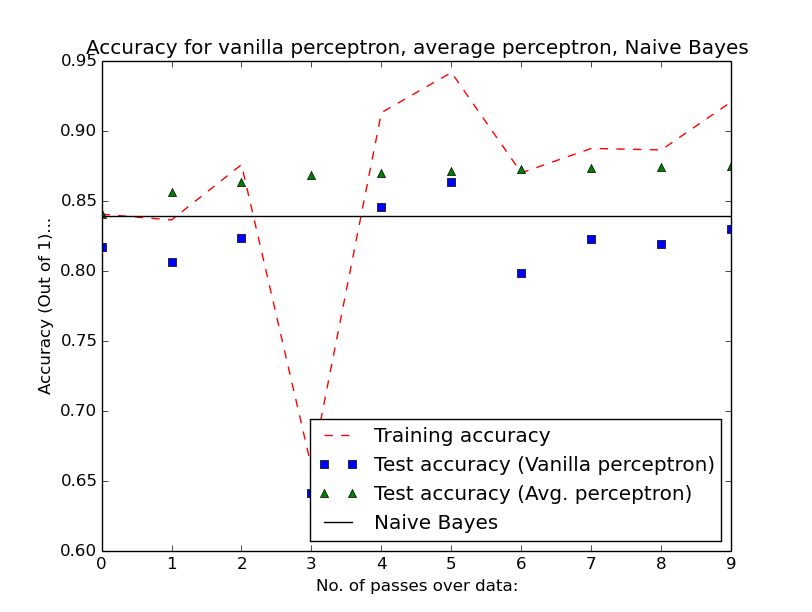

In [15]:
#**Show the graph with proper labelling, no code**
from IPython.display import Image
Image(filename='accuracy.png') 


## 5. Structured Perceptron with Viterbi (40 points) 

In this problem, you will implement a part-of-speech tagger for Twitter,
using the structured perceptron algorithm.
Your system will be not too far off from state of the art performance,
coding it all up yourself from scratch!

The dataset comes from http://www.ark.cs.cmu.edu/TweetNLP/
and is described in the papers listed there (Gimpel et al.~2011 and Owoputi et al.~2013).
The Gimpel article describes the tagset; the annotation guidelines on that webpage describe it futher.

Your structured perceptron will use your Viterbi implementation from 2.2 as a subroutine.
If that's buggy, this will cause many problems here---your perceptron will have really weird behavior.
(This happened to us when designing your assignment!)
If you have problems, try using the greedy decoding algorithm, which we provide in the starter code.
Make sure to note which decoding algorithm you're using in your writeup.

The starter code is `structperc.py` and it assumes the two data files `oct27.train`
and `oct27.dev` are in the same directory. (For simplicity we're just going to use this `dev` set as our test set.)


**Question 5.1** (2 points)

First let's do a little data analysis to establish the **most common tag** baseline accuracy.
Using a small script, load up the dev dataset (oct27.dev) using the function `structperc.read_tagging_file` (from `import structperc`). Calculate the following: What is the most common tag, and what would your accuracy be if you predicted it for all tags?




In [3]:
##Write your code here and show the output
# You may implement your code here
from structperc import *
ret=read_tagging_file("oct27.dev")
tags_count={}
max_count=['@',0]
total_count=0.0
for i in ret:
    for j in i[1]:
        if j in tags_count.keys():
            tags_count[j]+=1
            if tags_count[j]>max_count[1]:
                max_count[0]=j
                max_count[1]=tags_count[j]
        else:
            tags_count[j]=1
        total_count+=1
print max_count
#print tags_count
print "Base accuracy: "+str(max_count[1]/total_count)

#Most common tag 'V' with a count of 751. If all words in dev set were given 'V' tag, then accuracy: 15.57%


['V', 751]
Base accuracy: 0.155712212316


The structured perceptron algorithm works very similarly as the classification version you did in the previous question, except the prediction function uses Viterbi as a subroutine, which has to call feature extraction functions for local emissions and transition factors. There also has to be a large overall feature extraction function for an entire structure at once. The following parts will build up these pieces. First, we will focus on inference, not learning.

**Question 5.2** (2 points)

We provide a barebones version of `local_emission_features`, which calculates the local features for a particular tag at a token position. You can run this function all by itself. Make up an example sentence, and call this function with it, giving it a particular index and candidate tag. Show the code for the function call you made and the function's return value, and explain what the features mean (just a sentence or two).

#{'tag=V_curword=running': 1, 'tag=V_biasterm': 1}

When the current_word is 'running' (observed) the tag is a verb (hidden state). This count is currently 1. 
A biasterm is similar to the intercept in the logistic regression.

This can be thought of capture the intuition that "Verb" is more common than "adverbs"
It can also be used for assigning default tags. If the word is never seen before and NO other info is available, bias can tell what tag is most common & assign it to the unseen word

In [4]:
##Show the code for function call with output
print (local_emission_features(2, 'V', "I went running".split()))


{'tag=V_curword=running': 1, 'tag=V_biasterm': 1}


**Question 5.3** (2 points)

Implement `features_for_seq()`, which extracts the full feature vector $f(x,y)$, where $x$is a sentence and $y$ is an entire tagging sequence for that sentence. This will add up the feature vectors from each local emissions features for every position, as well as transition features for every position (there are $N-1$ of them, of course).
Show the output on a very short example sentence and example proposed tagging, that's only 2 or 3 words long.

To define $f(x,y)$ a little more precisely: If $f^{(B)}(t,x,y)$ means the local emissions feature vector at position $t$ (i.e. the `local_emission_features` function), and $f^{(A)}(y_{t-1},y_{t}, y)$ is the transition feature function for positions $(t-1,t)$ (which just returns a feature vector where everything is zero, except a single element is 1), then the full sequence feature vector will be the vector-sum of all those feature vectors:
$$ f(x,y) = \sum_t^T f^{(B)}(t,x,y) + \sum_{t=2}^T f^{(A)}(y_{t-1},y_t) $$
You implemented $f^{(B)}$ above.  You probably don't need to bother implementing $f^{(A)}$ as a standalone function.  You will have to decide on a particular convention to encode the name of a transition feature.  For example, one way to do it is with string concatenation like this, `"trans_%s_%s" % (prevtag, curtag)`, where prevtag and curtag are strings.  Or you could use a python tuple of strings, which works since
tuples have the ability to be keys in a python dictionary.

In other words: the emissions and transition features will all be in the same vector, just as keys in the dictionary that represents the feature vector.  The transition features are going to be the count of how many times a particular transition (tag bigram) happened.  The emissions features are going to be the vector-sum of all the local emission features, as calculated from `local_emission_features`.

#defaultdict(<type 'float'>, {'trans_V_V': 1, 'tag=P_biasterm': 1, 'trans_P_V': 1, 'tag=V_curword=running': 1, #'tag=V_curword=went': 1, 'tag=P_curword=I': 1, 'tag=V_biasterm': 2})

In [5]:
##Show the call to your function and output
print features_for_seq("I went running".split(), ['P','V','V'])


defaultdict(<type 'float'>, {'trans_V_V': 1.0, 'tag=P_biasterm': 1.0, 'trans_P_V': 1.0, 'tag=V_curword=running': 1.0, 'tag=V_curword=went': 1.0, 'tag=P_curword=I': 1.0, 'tag=V_biasterm': 2.0})


**Question 5.4** (4 points)

Look at the starter code for `calc_factor_scores`, which calculates the A and B score functions that are going to be passed in to your Viterbi implementation from problem 2, in order to do a prediction. The only function it will need to call is `local_emission_features`. It should NOT call `features_for_seq`.  Why not?

Features_for_seq adds up all the feature values, but for the probability tables we need individual values.

Viterbi uses the individual emission and transition probabilties while Perceptron uses the overall feature extraction.

Viterbi needs partial sums not the aggregate. It needs to distribute these partial sums amongst the nodes.

**Question 5.5** (6 points)

Implement `calc_factor_scores`. Make up a simple example (2 or 3 words long), with a simple model with at least some 
nonzero features (you might want to use a `defaultdict(float)`, so you don't have to fill up a dict with dummy values 
for all possible transitions), and show your call to this function and the output.

In [8]:
##Show the call to your function and output
weights_temp=defaultdict(float, {"trans_V_V":0.7,"trans_N_V":0.7,"tag=N_biasterm":1,"tag=N_curword=I":1})
print calc_factor_scores("I went running".split(),weights_temp)

({('D', '^'): 0.0, ('M', '@'): 0.0, ('^', '&'): 0.0, ('N', '#'): 0.0, ('G', 'G'): 0.0, ('X', 'D'): 0.0, ('#', 'U'): 0.0, ('E', 'M'): 0.0, (',', 'U'): 0.0, ('S', '!'): 0.0, ('@', 'X'): 0.0, ('A', 'N'): 0.0, ('T', '@'): 0.0, ('M', '&'): 0.0, ('A', 'Y'): 0.0, ('R', '#'): 0.0, ('O', '!'): 0.0, ('Y', 'V'): 0.0, ('O', 'O'): 0.0, ('V', 'X'): 0.0, ('G', 'E'): 0.0, ('E', 'D'): 0.0, ('&', '&'): 0.0, ('!', '&'): 0.0, ('R', '$'): 0.0, ('O', 'N'): 0.0, ('X', 'M'): 0.0, ('Z', '$'): 0.0, ('Z', '^'): 0.0, ('Y', 'E'): 0.0, ('G', 'D'): 0.0, ('R', '^'): 0.0, ('T', 'N'): 0.0, ('#', '@'): 0.0, ('Y', 'X'): 0.0, ('O', 'M'): 0.0, ('V', ','): 0.0, ('S', 'S'): 0.0, ('N', 'T'): 0.0, ('X', '^'): 0.0, ('R', '&'): 0.0, ('$', 'S'): 0.0, ('N', '^'): 0.0, ('O', 'L'): 0.0, ('Z', 'P'): 0.0, ('@', 'U'): 0.0, ('L', '#'): 0.0, ('#', '^'): 0.0, ('$', '&'): 0.0, ('D', 'S'): 0.0, ('D', 'X'): 0.0, ('V', 'T'): 0.0, ('P', 'V'): 0.0, ('P', 'O'): 0.0, ('E', '!'): 0.0, ('P', 'D'): 0.0, ('D', '$'): 0.0, ('S', '$'): 0.0, ('N', 'O'): 

**Question 5.6** (4 points)

Implement `predict_seq()`, which predicts the tags for an input sentence, given a model. It will have to calculate the factor scores, then call Viterbi as a subroutine, then return the best sequence prediction. If your Viterbi implementation does not seem to be working, use the implementation of the greedy decoding
algorithm that we provide (it uses the same inputs as `vit_starter.viterbi()`).


In [9]:
## Copy and paste predict_seq() function here
def predict_seq(tokens, weights): #Using Viterbi
    """
    IMPLEMENT ME!
    takes tokens and weights, calls viterbi and returns the most likely
    sequence of tags
    """
    # once you have Ascores and Bscores, could decode with
    # predlabels = greedy_decode(Ascores, Bscores, OUTPUT_VOCAB)
    (A_factor,B_factors)=calc_factor_scores(tokens,weights)
    predlabels=vit_starter.viterbi(A_factor, B_factors, OUTPUT_VOCAB)
    return predlabels

OK, you're done with the inference part.  Time to put it all together into the parameter learning algorithm and see it go. 

**Question 5.7** (14 points)

Implement `train()`, which does structured perceptron training with the averaged perceptron algorithm. You should train on oct27.train, and evaluate on oct27.dev. You will want to first get it working without averaging, then add averaging to it. Run it for 10 iterations, and print the devset accuracy at each training iteration. Note that we provide evaluation code, which assumes `predict_seq()` and everything it depends on is working properly.

For us, here's the performance we get at the first and last iterations, using the features in the starter code (just the bias term and the current word feature, without case normalization).

`
Training iteration 0
DEV RAW EVAL: 2556/4823 = 0.5300 accuracy
DEV AVG EVAL: 2986/4823 = 0.6191 accuracy
...
Training iteration 9
DEV RAW EVAL: 3232/4823 = 0.6701 accuracy
DEV AVG EVAL: 3341/4823 = 0.6927 accuracy
Learned weights for 24361 features from 1000 examples
`



In [10]:
train_examples=read_tagging_file('oct27.train')
test_examples=read_tagging_file('oct27.dev')
weights=train(train_examples, do_averaging=True, devdata=test_examples)

Training iteration 0
TR  RAW EVAL: 8523/14619 = 0.5830 accuracy
DEV RAW EVAL: 2556/4823 = 0.5300 accuracy
DEV AVG EVAL: 2984/4823 = 0.6187 accuracy
Training iteration 1
TR  RAW EVAL: 10643/14619 = 0.7280 accuracy
DEV RAW EVAL: 2956/4823 = 0.6129 accuracy
DEV AVG EVAL: 3171/4823 = 0.6575 accuracy
Training iteration 2
TR  RAW EVAL: 10148/14619 = 0.6942 accuracy
DEV RAW EVAL: 2692/4823 = 0.5582 accuracy
DEV AVG EVAL: 3281/4823 = 0.6803 accuracy
Training iteration 3
TR  RAW EVAL: 11681/14619 = 0.7990 accuracy
DEV RAW EVAL: 3150/4823 = 0.6531 accuracy
DEV AVG EVAL: 3311/4823 = 0.6865 accuracy
Training iteration 4
TR  RAW EVAL: 11722/14619 = 0.8018 accuracy
DEV RAW EVAL: 3028/4823 = 0.6278 accuracy
DEV AVG EVAL: 3322/4823 = 0.6888 accuracy
Training iteration 5
TR  RAW EVAL: 11799/14619 = 0.8071 accuracy
DEV RAW EVAL: 3003/4823 = 0.6226 accuracy
DEV AVG EVAL: 3333/4823 = 0.6911 accuracy
Training iteration 6
TR  RAW EVAL: 10765/14619 = 0.7364 accuracy
DEV RAW EVAL: 2839/4823 = 0.5886 accuracy


**Question 5.8** (6 points)

Print out a report of the accuracy rate for each tag in the development set. We provided a function to do this `fancy_eval`. Look at the two sentences in the dev data, and in your writeup show and compare the gold-standard tags versus your model's predictions for them.  Consult the tagset description to understand what's going on.
What types of things does your tagger get right and wrong?

To look at the examples, you may find it convenient to use `show_predictions` (or write up the equivalent manually).  For example, after 1 iteration of training, we get this output from the first sentence in the devset.
(After investigating TV shows that were popular in 2011 when the tweet was authored, we actually think some of the gold-standard tags in this example might be wrong.)


              word                 gold pred
              ----                 ---- ----
              @ciaranyree          @    @   
              it                   O    O   
              was                  V    V   
              on                   P    P   
              football             N    ^     *** Error
              wives                N    N   
              ,                    ,    ,   
              one                  $    $   
              of                   P    P   
              the                  D    D   
              players              N    N   
              and                  &    &   
              his                  D    D   
              wife                 N    N   
              own                  V    V   
              smash                ^    D     *** Error
              burger               ^    N     *** Error


To do this part, you may find it useful to save your model's weights with pickle.dumps (or json.dumps) and have a short analysis script that loads the model and devdata to do the reports.  If you have to re-train each time you tweak your analysis code, it can be annoying.


First, some intuition regarding the accuracies in general.
Firstly, we don't have the tag ~ and hence that gives 0/170 in fancy_eval()
There's lot of confusion between N (common noun) and Proper noun (^). This makes sense because the type of noun depends a lot on the context
Punctuation , has very high accuracy. This is explained by Bscores. Since the set of punctuation (comma, period, exclamation) is fairly small and can easily be determined. 

Coming to the 2 specific examples: consider the word 'smash'. Here smash is generally used as a verb in English. 
In this particular case however, it is a proper noun in the context. Thus our model predicted it wrongly as a verb.
In the second sentence, look at the pair (Currently[A], laughing[N]). The model made a mistake in guessing for 'Currently' but because in English usually Adjectives are followed by nouns (known as modifier or attributive position). Thus it tagged the next word as noun.

In [11]:
fancy_eval(test_examples,weights)
show_predictions(test_examples[0][0], test_examples[0][1], predict_seq(test_examples[0][0], weights))
show_predictions(test_examples[1][0], test_examples[1][1], predict_seq(test_examples[1][0], weights))



gold O acc 0.9489 (316/333)
gold , acc 0.9480 (474/500)
gold D acc 0.9295 (290/312)
gold & acc 0.9231 (84/91)
gold P acc 0.9205 (405/440)
gold V acc 0.8322 (625/751)
gold L acc 0.7538 (49/65)
gold T acc 0.7500 (27/36)
gold N acc 0.7000 (462/660)
gold R acc 0.6555 (137/209)
gold A acc 0.5900 (141/239)
gold E acc 0.5577 (29/52)
gold ! acc 0.5253 (52/99)
gold @ acc 0.4280 (104/243)
gold $ acc 0.3605 (31/86)
gold U acc 0.2747 (25/91)
gold ^ acc 0.2379 (74/311)
gold G acc 0.2000 (13/65)
gold # acc 0.0577 (3/52)
gold S acc 0.0000 (0/5)
gold X acc 0.0000 (0/4)
gold Z acc 0.0000 (0/9)
gold ~ acc 0.0000 (0/170)
word                 gold pred
----                 ---- ----
@ciaranyree          @    @   
it                   O    O   
was                  V    V   
on                   P    P   
football             N    N   
wives                N    V     *** Error
,                    ,    ,   
one                  $    $   
of                   P    P   
the                  D    D   
players

**Question 5.9** (OPTIONAL: 4 Extra Credit points)

Improve the features of your tagger to improve accuracy on the development set. This will only require changes to `local_emission_features`. Implement at least 4 new types of features. Report your tagger's accuracy with these improvements. Please make a table that reports accuracy from adding different features. The first row should be the basic system, and the last row should be the fanciest system. Rows in between should report different combinations of features. One simple way to do this is, if you have 4 different feature types, to run 4 experiments where in each one, you add only one feature type to the basic system. For example:

<img src="3.png"> 

Hint: if you make features about the first character of a word, that helps a lot for the # (hashtag) and @ (at-mention) tags.  The URL tag is easy to get too with a similar form of character affix analysis. Character affixes help lots of other tags too. Also, if you have a feature that looks at the word at position $t$, you can make new versions of it that look to the left or right of the $t^{th}$ position in question: for example, 'word_to_left=the'.


In [ ]:
#System: Accuracy (pickle file name) 

#basic: 0.6927 ("weights.p")
#basic+word_to_left: 0.7014 ("weights_left.p")
#basic+suffixes: 0.7035 ("weights_suffix.p")
#basic+length & Caps: 0.7168 ("weights_len.p")
#basic+hashtag & @ & URL tag: 0.7603 ("weights_url.p")
#basic+all_combined: 0.7864 ("weights_all.p")


